In [1]:
# Gerekli kütüphanelerin importu yapılıyor.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Veriyi oluşturacak fonksiyon yazılır
def load_data():
    df = pd.read_excel('Talent_Academy_Case_DT_2025.xlsx')
    print('Shape: ',df.shape)
    return df
    
raw = load_data() # Ana df oluşturuldu.

Shape:  (2235, 13)


In [3]:
df = raw.copy() # Ana datayı korumak için kopyası oluşturuldu.

# EDA

In [4]:
df.head() # Veri setinin ilk 5 satırı

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [5]:
df.describe() # çok az bilgi elde ediliyor şuan için.

,HastaNo,Yas
count,2235.000000,2235.000000
mean,145333.100224,47.327069
std,115.214248,15.208634
min,145134.000000,2.000000
25%,145235.000000,38.000000
50%,145331.000000,46.000000
75%,145432.000000,56.000000
max,145537.000000,92.000000


In [6]:
df.info() # veri seti hakkında bilgiler verir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [7]:
df.isna().sum() # Boş satırlar var mı diye kontrol edildi.

HastaNo              0
Yas                  0
Cinsiyet           169
KanGrubu           675
Uyruk                0
KronikHastalik     611
Bolum               11
Alerji             944
Tanilar             75
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri    221
UygulamaSuresi       0
dtype: int64

In [8]:
df[df.duplicated()].count() # tekrar eden veri çok fakat UygulamaYerleri ve UygulamaSuresi değişkenlik gösteriyor.

HastaNo            928
Yas                928
Cinsiyet           863
KanGrubu           618
Uyruk              928
KronikHastalik     662
Bolum              924
Alerji             524
Tanilar            899
TedaviAdi          928
TedaviSuresi       928
UygulamaYerleri    864
UygulamaSuresi     928
dtype: int64

In [9]:
df['Alerji'].unique() # Buradan anladığımıza göre verilerde anormallikler olabilir. 
                      #Pre-process aşamasında düzeltilecek.

array(['TOZ', nan, 'POLEN,NOVALGIN', 'NOVALGIN', 'Polen', 'Toz',
       'Polen,Yer Fıstığı', 'POLEN', 'TOZ,Novalgin', 'Sucuk', 'Volteren',
       'ARVELES,CORASPIN', 'VOLTAREN,Toz', 'Polen,Toz', 'GRİPİN',
       'Novalgin', 'VOLTAREN', 'Toz,TOZ', 'NOVALGIN,Novalgin', 'SUCUK',
       'TOZ,POLEN', 'TOZ,GRİPİN', 'SUCUK,GRIPIN', 'Novalgin,Sucuk',
       'VOLTAREN,Polen', 'Voltaren', 'GRIPIN', 'Polen,NOVALGIN',
       'Polen,TOZ', 'VOLTAREN,POLEN', 'POLEN,TOZ', 'NOVALGIN,Polen',
       'POLEN,Voltaren', 'Polen,GRIPIN', 'Volteren,GRİPİN',
       'TOZ,VOLTAREN', 'Novalgin,Polen', 'Voltaren,POLEN',
       'Polen,Voltaren'], dtype=object)

In [10]:
# Elimizdeki veri ile numerik ve kategorikleri ayırıp görselleştirme aşamasına geçiyoruz.

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['HastaNo', 'Yas']

We have 11 categorical features : ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi', 'UygulamaYerleri', 'UygulamaSuresi']


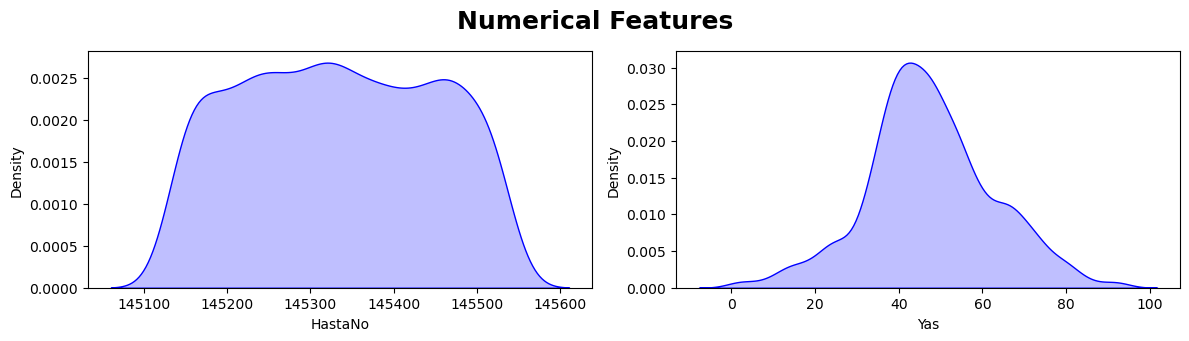

In [11]:
plt.figure(figsize=(12, 6))
plt.suptitle('Numerical Features', fontsize=18, fontweight='bold')

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]],fill=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.show()

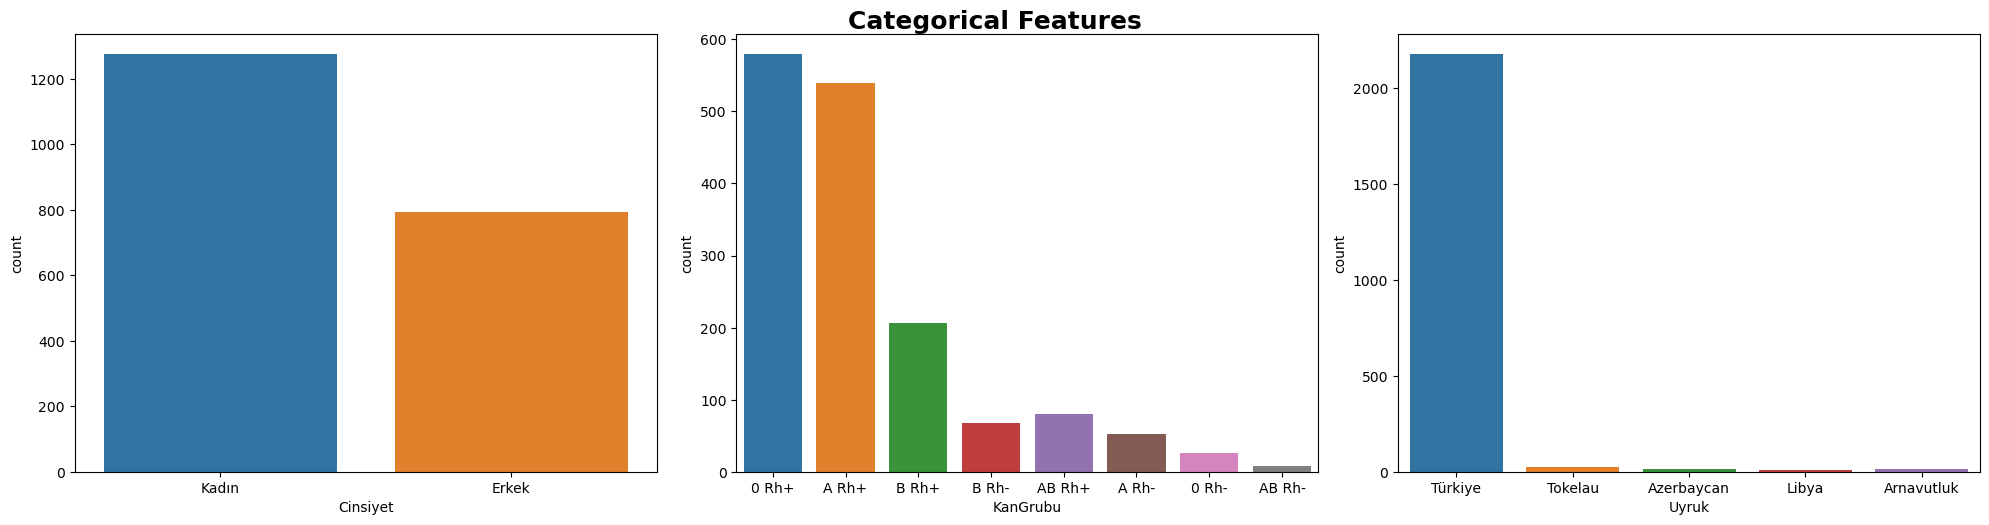

In [12]:
plt.figure(figsize=(20, 15))
plt.suptitle('Categorical Features', fontsize=18, fontweight='bold')
category = ['Cinsiyet','KanGrubu','Uyruk']
for i in range(0, len(category)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[category[i]])
    plt.xlabel(category[i])
    plt.tight_layout() 
plt.show()

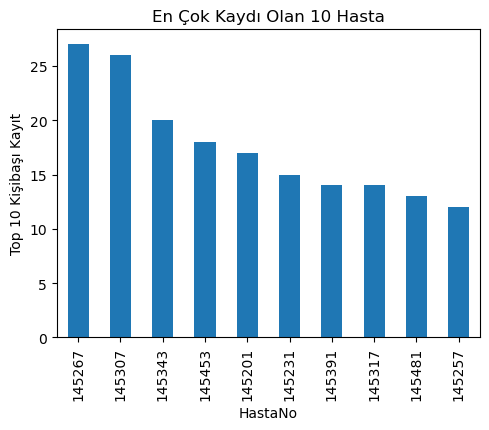

In [13]:
# Duplike hasta kaydı değerleri olduğu için HastaNo sütunundan biraz bilgi elde edebiliriz.

patient_counts = df['HastaNo'].value_counts()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
top_patients = patient_counts.head(10)
top_patients.plot(kind='bar')
plt.title('En Çok Kaydı Olan 10 Hasta')
plt.xlabel('HastaNo')
plt.ylabel('Top 10 Kişibaşı Kayıt')
plt.show()

In [14]:
df['TedaviSuresi'].unique() # Target(TedaviSuresi) sütununun unique değerleri.

array(['5 Seans', '15 Seans', '10 Seans', '18 Seans', '20 Seans',
       '2 Seans', '6 Seans', '4 Seans', '30 Seans', '11 Seans',
       '16 Seans', '21 Seans', '1 Seans', '8 Seans', '3 Seans', '7 Seans',
       '19 Seans', '29 Seans', '14 Seans', '17 Seans', '25 Seans',
       '22 Seans', '37 Seans'], dtype=object)

In [15]:
df['UygulamaSuresi'].unique() # UygulamaSuresi sütununun unique değerleri.

array(['20 Dakika', '5 Dakika', '30 Dakika', '15 Dakika', '10 Dakika',
       '45 Dakika', '25 Dakika', '3 Dakika', '40 Dakika', '8 Dakika'],
      dtype=object)

In [16]:
# TedaviSuresi ve UygulamaSuresi sayısal değerler dolayısıyla int'a çevirip işlemlerimizde kullanabiliriz.

df['TedaviSuresiNumeric'] = pd.to_numeric(df['TedaviSuresi'].str.extract('(\d+)')[0])
df['UygulamaSuresiNumeric'] = pd.to_numeric(df['UygulamaSuresi'].str.extract('(\d+)')[0])

In [17]:
df['TedaviSuresiNumeric'].dtype

dtype('int64')

In [18]:
# Çok fazla 15 seans yapılmış.
df['TedaviSuresiNumeric'].value_counts()


15    1670
10     175
20     113
2       45
17      36
4       35
16      27
21      20
18      20
5       17
30      12
19      10
11       9
3        7
8        6
7        5
29       5
25       5
22       5
37       5
1        3
6        3
14       2
Name: TedaviSuresiNumeric, dtype: int64

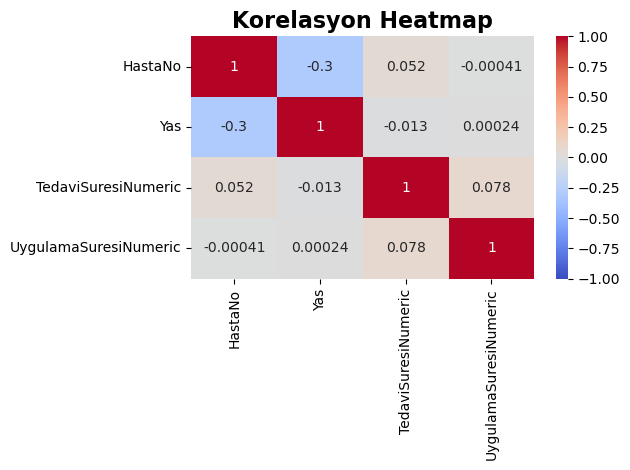

In [19]:
# Çok az çıktı var ve zayıf. Daha fazla nitelik gerekiyor. Ne 1'e ne -1'e yakın.

corr_df= df[["HastaNo", "Yas", "TedaviSuresiNumeric", "UygulamaSuresiNumeric"]].corr()

sns.heatmap(corr_df,annot=True,cmap='coolwarm',center=0,vmin=-1,vmax=1)
plt.title('Korelasyon Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

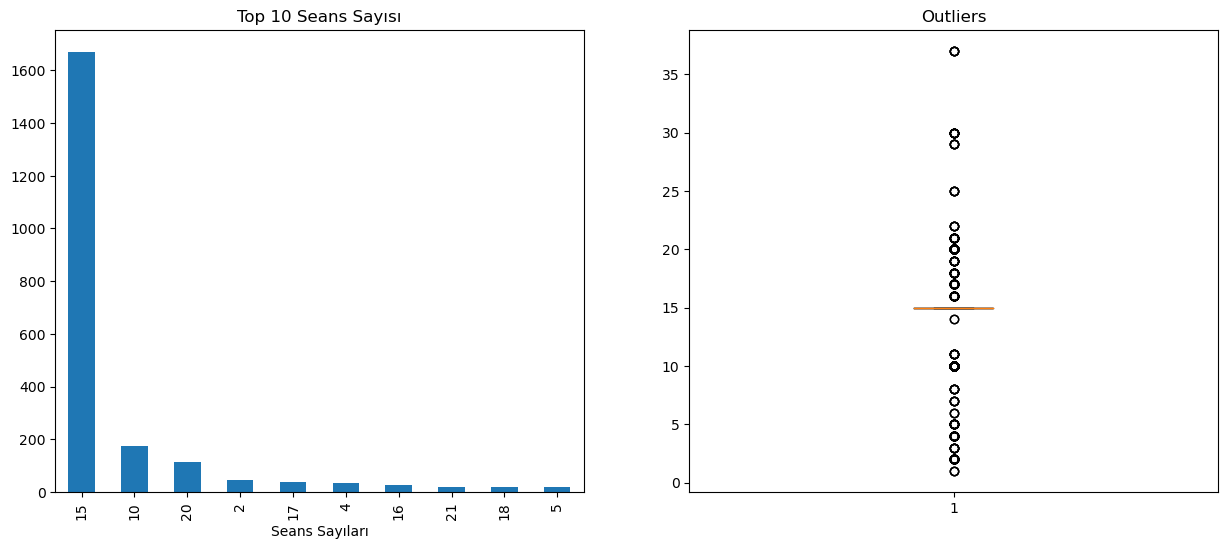

In [20]:
# Target definition 'TedaviSuresiNumeric' ile ilgili bir kaç görselleştirme grafiği

# Seans sayılarından en çok hangilerinin kullanıldığını gösteren bir plot
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
df['TedaviSuresiNumeric'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Seans Sayısı')
plt.xlabel('Seans Sayıları')

# Outlier tespiti için boxplot
plt.subplot(1,2,2)
plt.boxplot(df['TedaviSuresiNumeric'].dropna())
plt.title('Outliers')
plt.show()

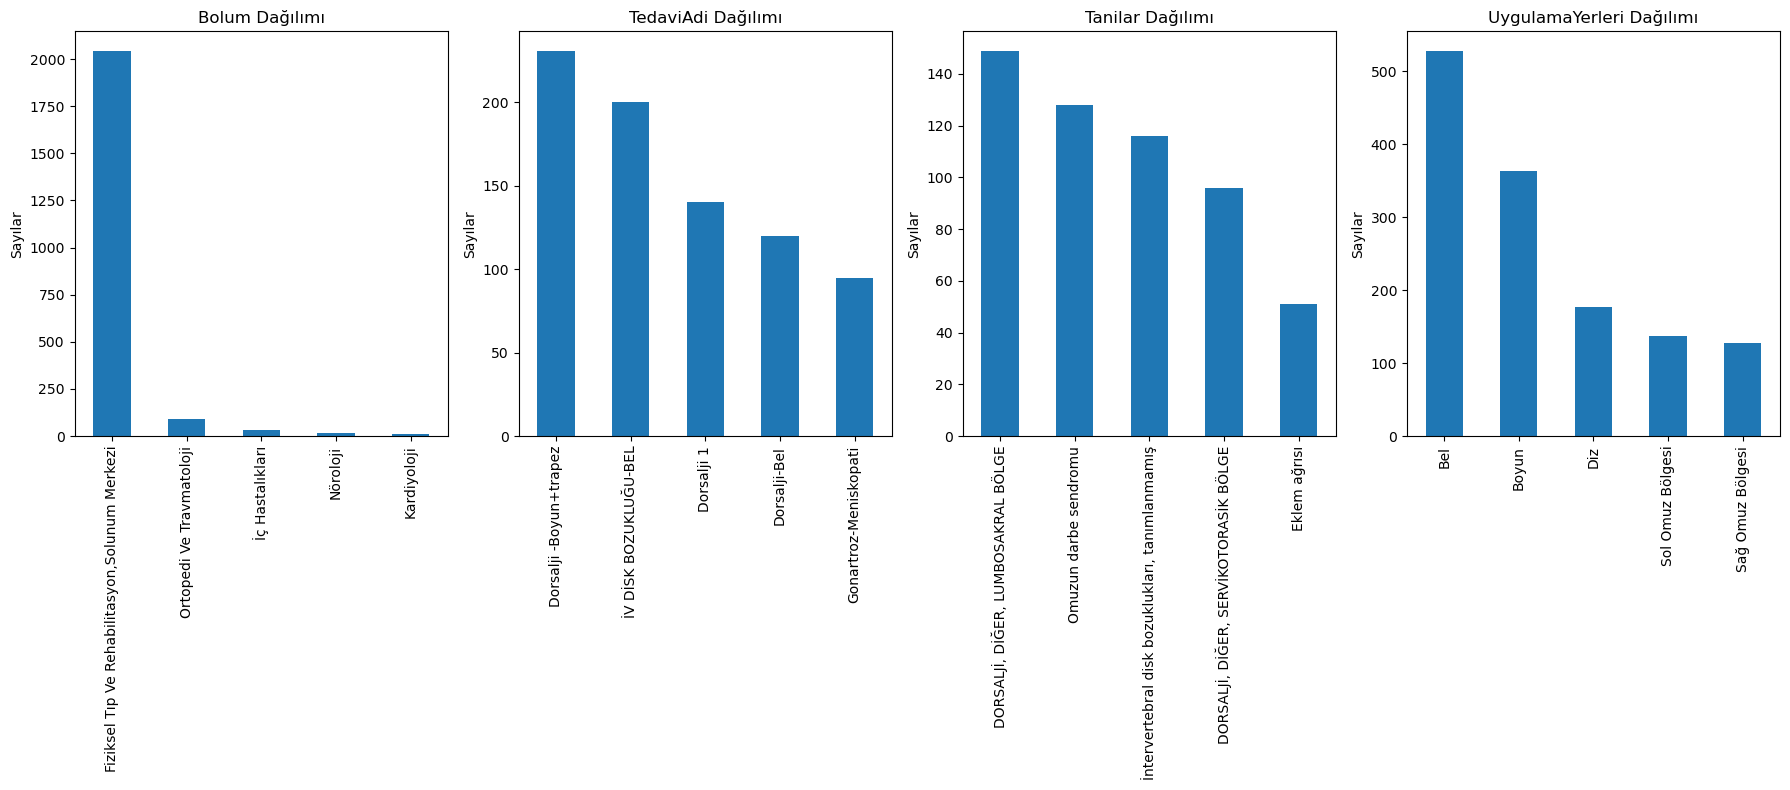

In [21]:
# Kategoriklere ek fazla değer olanların ilk 5'ini görebiliriz

categorical_columns = ['Bolum','TedaviAdi','Tanilar','UygulamaYerleri']

fig, axes = plt.subplots(1, 4, figsize=(18, 8))
    
for i, col in enumerate(categorical_columns):
    df[col].value_counts().head(5).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col} Dağılımı')
    axes[i].set_ylabel('Sayılar')
    

plt.tight_layout() # sıkıştırmak için
plt.show()

In [22]:
# Kategorik bir sütuna göre tedavi sürelerinin istatistikleri incelenebilir.

df.groupby("Bolum")["TedaviSuresiNumeric"].agg(["mean","median","count","max","min"])

,mean,median,count,max,min
Bolum,,,,,
"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",15.136430,15.0,2045,37,1
Genel Cerrahi,9.833333,8.0,6,15,5
Göğüs Hastalıkları,13.125000,15.0,8,15,10
Kalp Ve Damar Cerrahisi,11.000000,11.0,4,11,11
Kardiyoloji,11.363636,10.0,11,15,10
Laboratuar,9.857143,15.0,7,15,3
Nöroloji,10.000000,10.0,17,15,5
Ortopedi Ve Travmatoloji,4.818182,4.0,88,15,1
Tıbbi Onkoloji,9.000000,9.0,6,10,8


In [24]:
# Cinsiyet için de bakılabilir.
df.groupby("Cinsiyet")["TedaviSuresiNumeric"].agg(["mean","median","count","max","min"])

,mean,median,count,max,min
Cinsiyet,,,,,
Erkek,14.406566,15.0,792,29,1
Kadın,14.771586,15.0,1274,37,1


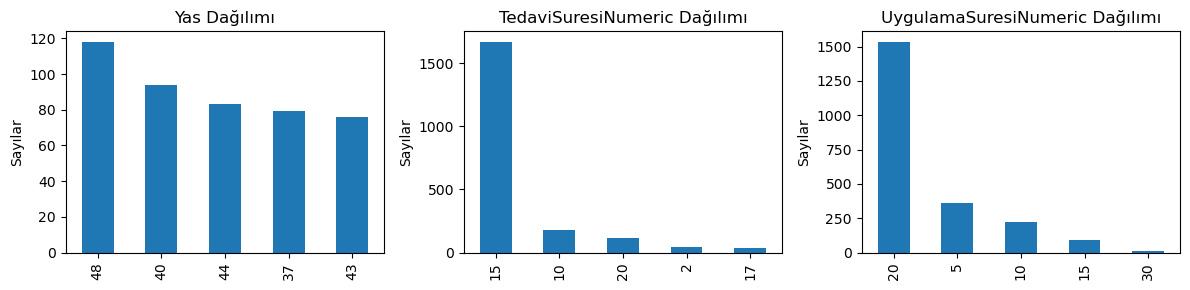

In [25]:
# Numerik değerlerin grafiksel şeması incelenebilir.

numerical_columns = ['Yas', 'TedaviSuresiNumeric', 'UygulamaSuresiNumeric']

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
for i, col in enumerate(numerical_columns):
    df[col].value_counts().head(5).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col} Dağılımı')
    axes[i].set_ylabel('Sayılar')
    
plt.tight_layout() # biraz sıkıştırmak için
plt.show()

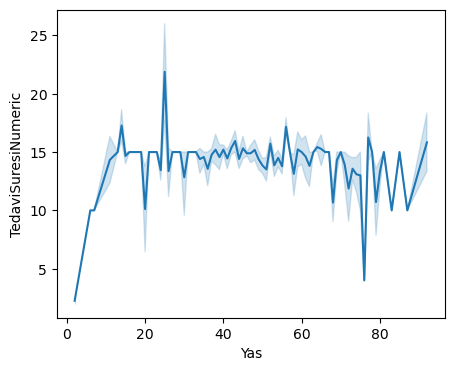

In [26]:
# Yaş verisinin tedavisüresinde bir etkisinin olduğunu yorumlayabileceğimiz bir grafik.
plt.figure(figsize=(5,4))
sns.lineplot(x="Yas", y="TedaviSuresiNumeric",data=df)
plt.show()

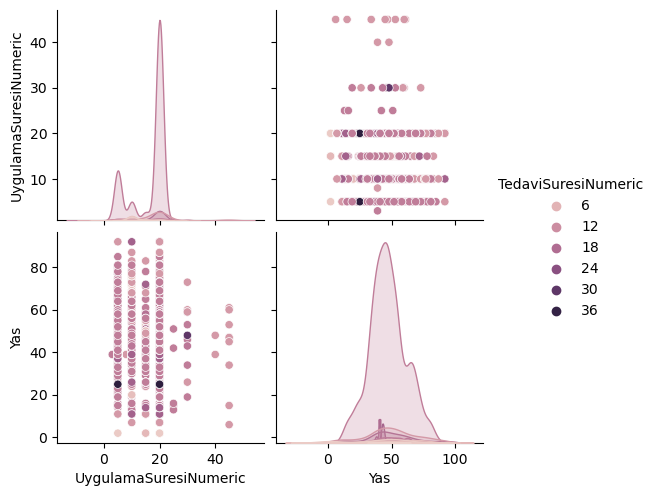

In [27]:
# Seans dakikalarının Uygulama süresi ve yas üzerindeki dağılımı 
sns.pairplot(data=df[['UygulamaSuresiNumeric','Yas','TedaviSuresiNumeric']],hue='TedaviSuresiNumeric',diag_kind='kde')
plt.show()

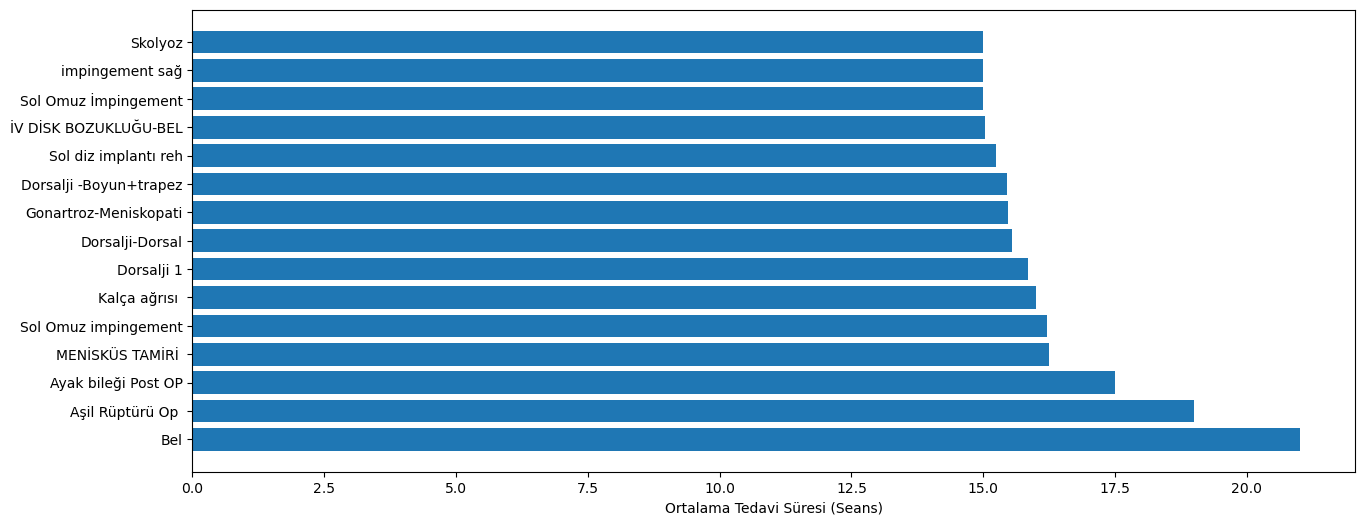

In [28]:
# Tedavilerin TedaviSuresi üzerinde olan etkisini gözlemlemek için oluşturulan grafik ve özet

tedaviAdi_stats = df.groupby('TedaviAdi')['TedaviSuresiNumeric'].agg(['mean', 'median', 'std', 'count'])

# Veri güvenilirliği açısından 10 dan fazla kaydı olan tedavileri alıyorum.
tedaviAdi_stats_last = tedaviAdi_stats[tedaviAdi_stats['count'] >= 10]
# Ortalaması Büyükten Küçüğe olacak şekilde sort ediyorum.
tedaviAdi_stats_last = tedaviAdi_stats_last.sort_values('mean', ascending=False)

top_treatments = tedaviAdi_stats_last.head(15)
plt.figure(figsize=(15, 6))
plt.barh(y=range(len(top_treatments)), width=top_treatments['mean'])
plt.xlabel('Ortalama Tedavi Süresi (Seans)')
plt.yticks(ticks=range(len(top_treatments)), labels=top_treatments.index)
plt.show()

In [29]:
# İstersek basit bir şekilde ortalama en uzun süren tedaviyi de yazdırabiliriz.
print("En Uzun Süren Tedavi:",tedaviAdi_stats_last.head(1).index[0])

En Uzun Süren Tedavi: Bel


In [30]:
# Son olarak IQR yöntemi ile toplam outlier sayısını bulabiliriz.

Q1 = df['TedaviSuresiNumeric'].quantile(0.25)
Q3 = df['TedaviSuresiNumeric'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['TedaviSuresiNumeric'] < Q1 - 1.5*IQR) | (df['TedaviSuresiNumeric'] > Q3 + 1.5*IQR)]
print(f"Outlier sayısı: {len(outliers)}")

Outlier sayısı: 565


# Data Pre-Processing

In [31]:
# METİN TEMİZLEME 

In [32]:
df_clean = df.copy() # EDA tarafında yapılan veri setinin kopyası oluşturuldu

In [33]:
df_clean.tail()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,TedaviSuresiNumeric,UygulamaSuresiNumeric
2230,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,10 Dakika,15,10
2231,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,20 Dakika,15,20
2232,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,​Algonörodistrofi,​ ay...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,20 Dakika,15,20
2233,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,15 Dakika,15,15
2234,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,5 Dakika,15,5


In [34]:
df_clean['Yas'].unique() # Boşluklar var fakat numerik olduğu için sorun değil.

array([60, 28, 65, 61, 52, 48, 46, 92, 59, 72, 77, 66, 73, 85, 54, 74, 53,
       47, 42, 50, 80, 69, 40, 71, 68, 62, 33, 45, 38, 43, 57, 51, 44, 36,
       20, 39,  2, 49, 79, 75, 56, 34, 15, 63, 24, 41, 55, 70, 83, 14, 16,
       19, 37, 32, 13, 35, 25, 64, 23, 58, 11, 81, 30, 21, 22, 27, 29, 76,
       78, 31, 67,  7, 26, 87,  6])

In [35]:
df_clean['Cinsiyet'].unique() # nan değerler imputation ile doldurulacak. Değerlerde anormallik yok.

array(['Kadın', 'Erkek', nan], dtype=object)

In [36]:
df_clean['KanGrubu'].unique() # nan değerler imputation ile doldurulacak. Değerlerde anormallik yok

array(['0 Rh+', 'A Rh+', 'B Rh+', 'B Rh-', 'AB Rh+', nan, 'A Rh-',
       '0 Rh-', 'AB Rh-'], dtype=object)

In [37]:
df_clean['Uyruk'].unique() # Değerlerde sorun yok.

array(['Türkiye', 'Tokelau', 'Azerbaycan', 'Libya', 'Arnavutluk'],
      dtype=object)

In [38]:
df_clean['KronikHastalik'].value_counts() # Değerlerde sorun yok.

Myastenia gravis                                                                38
Aritmi                                                                          36
Fascioscapulohumeral Distrofi                                                   36
Hipertiroidizm                                                                  34
Limb-Girdle Musküler Distrofi, Astım                                            34
                                                                                ..
Aritmi, Diyabet, Kalp yetmezliği, Hiportiroidizm                                 1
Fascioscapulohumeral Distrofi, Hiportiroidizm, Limb-Girdle Musküler Distrofi     1
Fascioscapulohumeral Distrofi, Myastenia gravis                                  1
Polimiyozit, Diyabet, Becker Musküler Distrofisi                                 1
Becker Musküler Distrofisi, Hiportiroidizm, Kalp yetmezliği                      1
Name: KronikHastalik, Length: 220, dtype: int64

In [39]:
df_clean['Bolum'].unique() # nan değerler imputation ile doldurulacak. Değerlerde anormallik yok.

array(['Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi',
       'İç Hastalıkları', 'Ortopedi Ve Travmatoloji', 'Kardiyoloji', nan,
       'Kalp Ve Damar Cerrahisi', 'Genel Cerrahi', 'Tıbbi Onkoloji',
       'Göğüs Hastalıkları', 'Nöroloji', 'Laboratuar'], dtype=object)

In [40]:
 df_clean['Alerji'].unique() # Anormallik var. Düzeltilme yapılması gerek. NaN değerler doldurulacak.

array(['TOZ', nan, 'POLEN,NOVALGIN', 'NOVALGIN', 'Polen', 'Toz',
       'Polen,Yer Fıstığı', 'POLEN', 'TOZ,Novalgin', 'Sucuk', 'Volteren',
       'ARVELES,CORASPIN', 'VOLTAREN,Toz', 'Polen,Toz', 'GRİPİN',
       'Novalgin', 'VOLTAREN', 'Toz,TOZ', 'NOVALGIN,Novalgin', 'SUCUK',
       'TOZ,POLEN', 'TOZ,GRİPİN', 'SUCUK,GRIPIN', 'Novalgin,Sucuk',
       'VOLTAREN,Polen', 'Voltaren', 'GRIPIN', 'Polen,NOVALGIN',
       'Polen,TOZ', 'VOLTAREN,POLEN', 'POLEN,TOZ', 'NOVALGIN,Polen',
       'POLEN,Voltaren', 'Polen,GRIPIN', 'Volteren,GRİPİN',
       'TOZ,VOLTAREN', 'Novalgin,Polen', 'Voltaren,POLEN',
       'Polen,Voltaren'], dtype=object)

In [41]:
# Hepsi aynı formatta olacak şekilde düzeltiyorum.
df_clean['Alerji'] = df_clean['Alerji'].apply(
    lambda x: ','.join([i.strip().title() for i in str(x).split(',')]) if pd.notna(x) else np.nan
)

replace_alerji = {
    'Toz,Toz': 'Toz',
    'Novalgin,Novalgin': 'Novalgin',
    'Polen,Novalgin': 'Novalgin,Polen',
    'Polen,Toz': 'Toz,Polen',
    'Gri̇Pi̇N': 'Gripin',
    'Toz,Gri̇Pi̇N': 'Toz,Gripin',
    'Volteren,Gri̇Pi̇N': 'Volteren,Gripin',
    'Voltaren,Toz': 'Toz,Voltaren',
    'Volteren': 'Voltaren',
    'Voltaren,Polen': 'Polen,Voltaren',
    'Volteren,Gripin': 'Voltaren,Gripin'
}
df_clean['Alerji'] = df_clean['Alerji'].replace(replace_alerji)

In [42]:
df_clean['Alerji'].unique()

array(['Toz', nan, 'Novalgin,Polen', 'Novalgin', 'Polen',
       'Polen,Yer Fıstığı', 'Toz,Novalgin', 'Sucuk', 'Voltaren',
       'Arveles,Coraspin', 'Toz,Voltaren', 'Toz,Polen', 'Gri̇pi̇n',
       'Toz,Gri̇pi̇n', 'Sucuk,Gripin', 'Novalgin,Sucuk', 'Polen,Voltaren',
       'Gripin', 'Polen,Gripin', 'Volteren,Gri̇pi̇n'], dtype=object)

In [43]:
# Tanilar içinde anormallik var. \xa0 , \u200b, fazladan ',' kullanımı gibi dummyler var. 
df_clean['Tanilar'] = df_clean['Tanilar'].where(df_clean['Tanilar'].notna()).apply(
    lambda x: re.sub(r'[\u2000-\u206F\uFEFF]', '', x).strip() if pd.notna(x) else x
)

df_clean['Tanilar'] = df_clean['Tanilar'].apply(lambda x: x.strip() if pd.notna(x) else x)
df_clean['Tanilar'] = df_clean['Tanilar'].apply(lambda x: ','.join(part.strip() for part in x.split(',')) if pd.notna(x) else x)
df_clean['Tanilar'] = df_clean['Tanilar'].apply(lambda x: ', '.join(part.title() for part in x.split(',')) if pd.notna(x) else x)

different_characters_tanilar = {
    '\xa0': ' ',       # non breaking space
    '\u200b': '',      # sıfır genişlikte boşluk
    '\ufeff': '',      # byte order mark
    '\u2003': ' ',     # geniş boşluk
    '"': '',           
    ',,': ',',
    'i̇': 'i',
    '\u200d': '',
    '\xad': '',
    '`': '',
    "'Dorsalji": "Dorsalji"
}

for char, replace in different_characters_tanilar.items():
    df_clean['Tanilar'] = df_clean['Tanilar'].apply(lambda x: x.replace(char, replace) if pd.notna(x) else x)

In [44]:
#Tedavi Adında da anormallikler var. Düzeltilecek
#Tanılarda yapılan benzer metin düzeltme işlemlerini uyguluyoruz.
df_clean['TedaviAdi'] = df_clean['TedaviAdi'].astype(str).str.strip()
df_clean['TedaviAdi'] = df_clean['TedaviAdi'].apply(lambda x: re.sub(r'[\u2000-\u206F\uFEFF]', '', x))
df_clean['TedaviAdi'] = df_clean['TedaviAdi'].str.replace(r'\s+', ' ', regex=True)
df_clean['TedaviAdi'] = df_clean['TedaviAdi'].str.replace(r'\++', '+', regex=True)
df_clean['TedaviAdi'] = df_clean['TedaviAdi'].str.replace(r'\-+', '-', regex=True)
    
different_characters_tanilar = {
        'ağrsıı': 'ağrısı',
        'ağrısııı': 'ağrısı',
        'İmpingementt': 'İmpingement',
        'İMpingementt': 'İmpingement',
}
for old, new in different_characters_tanilar.items():
    df_clean['TedaviAdi'] = df_clean['TedaviAdi'].str.replace(old, new, regex=False)
    df_clean['TedaviAdi'] = df_clean['TedaviAdi'].str.title()
    
    noneed_values = ['Onur', 'Xx', 'Deneme']
    df_clean = df_clean[~df_clean['TedaviAdi'].isin(noneed_values)]


In [45]:
# MISSING DATA IMPUTATION

In [46]:
df_clean.isna().sum()

HastaNo                    0
Yas                        0
Cinsiyet                 169
KanGrubu                 675
Uyruk                      0
KronikHastalik           611
Bolum                     11
Alerji                   938
Tanilar                   69
TedaviAdi                  0
TedaviSuresi               0
UygulamaYerleri          220
UygulamaSuresi             0
TedaviSuresiNumeric        0
UygulamaSuresiNumeric      0
dtype: int64

In [47]:
df_clean.head(3)

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,TedaviSuresiNumeric,UygulamaSuresiNumeric
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Toz,Ayak Bileği Ve Ayağın Yüzeysel Yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika,5,20
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun Darbe Sendromu, Dorsalji, Diğer, Servik...",Dorsalji -Boyun+Trapez+Skapular,15 Seans,Boyun,20 Dakika,15,20
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun Darbe Sendromu, Dorsalji, Diğer, Servik...",Dorsalji -Boyun+Trapez+Skapular,15 Seans,"Boyun,Sırt",20 Dakika,15,20


In [48]:
# Alerji sütununda çok fazla(938) NaN değer var. Mantık olarak değer yoksa alerjisi de yoktur. Unique değer de fazla
# Büyük oranda boş değer var ama sonradan flaglenebilir (var,yok gibi). O yüzden drop etmiyorum. 
df_clean['Alerji'].fillna('Yok', inplace=True)

In [49]:
# KanGrubu sütununda da çok fazla bilinmeyen satır var. Model için 'Bilinmiyor' şeklinde doldurulacak.
df_clean['KanGrubu'].fillna('Bilinmiyor', inplace=True)

In [50]:
# Tanilarda TedaviAdi'na göre şekilleniyor. O yüzden ona göre dolduracağım.
mode_tanilar = df_clean.groupby('TedaviAdi')['Tanilar'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Yok')

df_clean['Tanilar'] = df_clean.apply(
lambda row: mode_tanilar[row['TedaviAdi']] if pd.isna(row['Tanilar']) else row['Tanilar'],
    axis=1
)

In [51]:
#Cinsiyet için K/E oranında doldurmak en mantıklısı dağılımı korunmuş olur.
counts = df_clean['Cinsiyet'].value_counts()
total = counts.sum()
oran = counts / total  # Kadın/Erkek oranı burda

nan_index = df_clean[df_clean['Cinsiyet'].isna()].index

# Rastgele seçim yaparak eksikleri doldur
df_clean.loc[nan_index, 'Cinsiyet'] = np.random.choice(
    ['Kadın', 'Erkek'],
    size=len(nan_index),
    p=[oran['Kadın'], oran['Erkek']]
)

In [52]:
# Bolum sütununda 11 tane nan değeri var. KronikHastalik ile bağlantılı olduğunu düşünüyorum.
#KronikHastalik sütununa göre Bolum sütunundan en sık tekrar eden değeri buluyor. Ve onu nan değerine atıyor.
df_clean['Bolum'] = df_clean['Bolum'].fillna(df_clean.groupby('KronikHastalik')['Bolum'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))


In [53]:
# UygulamaYerleri sütununda 220 nan değer var.
# Tanilara benzer şekilde -> TedaviAdi ile ilişkili olduğunu ufak bir inceleme sonucunda farkına vardım.
# TedaviAdına göre gruplayıp o tedavi adında olan uygulama yerlerinin modunu alıp dolduracağım. Eğer hiçbir bilgi yoksa 'Yok'.
mode_uygulama = (df_clean.groupby("TedaviAdi")["UygulamaYerleri"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else "Yok"))

df_clean["UygulamaYerleri"] = df_clean.apply(
    lambda row: mode_uygulama.get(row["TedaviAdi"], "Yok") if pd.isna(row["UygulamaYerleri"]) else row["UygulamaYerleri"],
    axis=1
)


In [54]:
# KronikHastalik sütununda çok fazla nan ve unique değer var. Mantık olarak ya kronik hastalığın vardır ya da yoktur
# nan değerleri 'Yok' ile değiştireceğim.
df_clean['KronikHastalik'].fillna('Bilinmiyor', inplace=True)

In [55]:
list(df_clean.isna().sum()) # hiç boş değer kalmadı.

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [56]:
# FEATURE ENGINEERING

In [57]:
# Alerji kısmında bahsettiğimiz işlemi yapalım. Alerji var mı yok mu bir sütunda görelim.
df_clean['AlerjiVarMı'] = df_clean['Alerji'].apply(lambda x: 0 if x == "Yok" else 1)

# Tanilar sütununda birden fazla tanı olabiliyor onları count edebiliriz.
df_clean['Tani_Sayisi'] = df_clean['Tanilar'].str.count(',') + 1

# UygulamaYeri sayısı TedaviSüresi'ne doğrudan etki edebilir. Birden fazla yer birden fazla sean olabilir.
df_clean['UygulamaYeri_Sayisi'] = df_clean['UygulamaYerleri'].str.count(',') + 1

# Dakika/Seans oranı modele yardımcı olabilir.
df_clean['TedaviYogunlugu'] = df_clean['UygulamaSuresiNumeric'] / df_clean['TedaviSuresiNumeric']

# KronikHastalikta aynı şekilde count edilebilir.
df_clean['KronikHastalik_Sayisi'] = df_clean['KronikHastalik'].apply(lambda x: 0 if x == 'Yok' else len(str(x).split(',')))

# Duplike değerlerden hatırlayalım. Hasta'nın ne kadar sıklıkla geldiği de tedavi süresine etki edebilir.
patient_counts = df_clean['HastaNo'].value_counts()
df_clean['ZiyaretSayisi'] = df_clean['HastaNo'].map(patient_counts)

#Yaşları gruplayabiliriz. Genç orta yaşlı gibi. min = 2 , max = 92
bins = [0,17,39,59,93]
labels = ['Çocuk','Genç','Yetişkin','Yaşlı']
df_clean['YasGrubu'] = pd.cut(df_clean['Yas'], bins=bins, labels=labels)

In [58]:
# ENCODING DATA

In [59]:
# cinsiyette sadece iki değişken var o yüzden label encoder yeterli olur. Binary (0,1)
encoder = LabelEncoder()
df_clean['Cinsiyet_Encode'] = encoder.fit_transform(df_clean['Cinsiyet'])

In [60]:
# Olusturdugumuz yas grubunu one hot tekniği ile encode edebiliriz. Unique değer az fazlo kolon çıkmaz.
yasgrubu_dummies = pd.get_dummies(df_clean['YasGrubu'], prefix='YasGrubu', drop_first=True)
df_clean = pd.concat([df_clean, yasgrubu_dummies], axis=1)

In [61]:
# Tedavi adı ve Tanilar için target encoding yapıyoruz. Nedeni ise direkt olarak Tedavi süresi ile ilişki kurabilir.
tedaviAdi_target = df_clean.groupby('TedaviAdi')['TedaviSuresiNumeric'].mean().to_dict()
df_clean['TedaviAdi_Encode'] = df_clean['TedaviAdi'].map(tedaviAdi_target)

tanilar_target = df_clean.groupby('Tanilar')['TedaviSuresiNumeric'].mean().to_dict()
df_clean['Tanilar_Encode'] = df_clean['Tanilar'].map(tanilar_target)

In [62]:
df_clean['Bolum'].value_counts() # Çoğunluku FTR çıkıyor. Binary yapıp FTR ise 1 değilse 0 yapmak mantıklı.


Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    2053
Ortopedi Ve Travmatoloji                            88
İç Hastalıkları                                     30
Nöroloji                                            17
Kardiyoloji                                         11
Göğüs Hastalıkları                                   8
Tıbbi Onkoloji                                       6
Genel Cerrahi                                        5
Kalp Ve Damar Cerrahisi                              4
Laboratuar                                           4
Name: Bolum, dtype: int64

In [63]:
# Burada işlemi yapıyoruz
df_clean['FTR_mi_Encoded'] = df_clean['Bolum'].str.contains('Fiziksel Tıp').astype(int)

In [64]:
# FINAL

In [65]:
df_final = df_clean.copy()

In [66]:
target = 'TedaviSuresiNumeric'

In [67]:
# Eski kategorik ve metin sütunlarını siliyoruz. Bize numerik değerler gerekiyor.
drop_columns = ['HastaNo','Cinsiyet','KanGrubu','Tanilar','Uyruk','KronikHastalik','Bolum','Alerji','TedaviAdi','YasGrubu','UygulamaSuresi','UygulamaYerleri','TedaviSuresi']
df_final.drop(columns=drop_columns, inplace=True,axis=1)

In [68]:
# Son bir overview
print('Final dataset shape: ', df_final.shape, 'Ham dataset shape: ', df.shape)
df_final.info()
df_final.head()

Final dataset shape:  (2226, 16) Ham dataset shape:  (2235, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 0 to 2234
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Yas                    2226 non-null   int64  
 1   TedaviSuresiNumeric    2226 non-null   int64  
 2   UygulamaSuresiNumeric  2226 non-null   int64  
 3   AlerjiVarMı            2226 non-null   int64  
 4   Tani_Sayisi            2226 non-null   int64  
 5   UygulamaYeri_Sayisi    2226 non-null   int64  
 6   TedaviYogunlugu        2226 non-null   float64
 7   KronikHastalik_Sayisi  2226 non-null   int64  
 8   ZiyaretSayisi          2226 non-null   int64  
 9   Cinsiyet_Encode        2226 non-null   int64  
 10  YasGrubu_Genç          2226 non-null   uint8  
 11  YasGrubu_Yetişkin      2226 non-null   uint8  
 12  YasGrubu_Yaşlı         2226 non-null   uint8  
 13  TedaviAdi_Encode       2226 non-null   float

,Yas,TedaviSuresiNumeric,UygulamaSuresiNumeric,AlerjiVarMı,Tani_Sayisi,UygulamaYeri_Sayisi,TedaviYogunlugu,KronikHastalik_Sayisi,ZiyaretSayisi,Cinsiyet_Encode,YasGrubu_Genç,YasGrubu_Yetişkin,YasGrubu_Yaşlı,TedaviAdi_Encode,Tanilar_Encode,FTR_mi_Encoded
0,60,5,20,1,1,1,4.000000,3,1,1,0,0,1,5.0,5.0,1
1,28,15,20,0,4,1,1.333333,4,5,0,1,0,0,15.0,15.0,1
2,28,15,20,0,4,2,1.333333,4,5,0,1,0,0,15.0,15.0,1
3,28,15,5,0,4,1,0.333333,4,5,0,1,0,0,15.0,15.0,1
4,28,15,20,0,4,2,1.333333,4,5,0,1,0,0,15.0,15.0,1


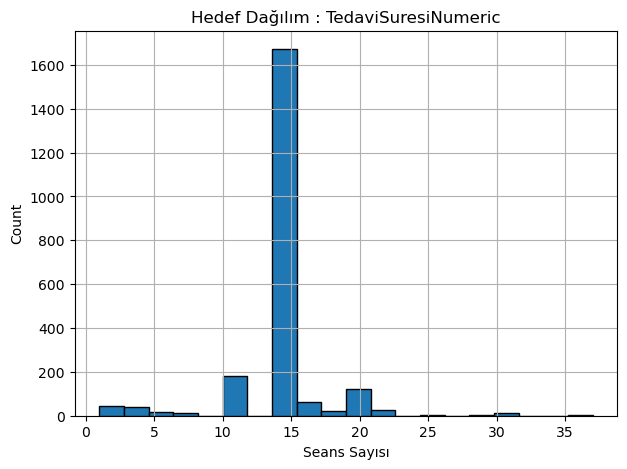

In [69]:
plt.figure(figsize=(7,5))
df_final[target].hist(bins=20, edgecolor="black")
plt.title("Hedef Dağılım : TedaviSuresiNumeric")
plt.xlabel("Seans Sayısı")
plt.ylabel("Count")
plt.show()